In [82]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Dataset BG + Gestos

In [42]:
background = pd.read_csv("../data/processed/background.csv")
foreground = pd.read_csv("../data/processed/newTrain.csv")
foreground_test = pd.read_csv("../data/processed/newTest.csv")

In [7]:
display(background.head())
display(foreground.head())

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,73.0,91.0,102.0,97.0,81.0,101.0,80.0,75.0,74.0,64.0,...,92.0,88.0,90.0,181.0,213.0,207.0,171.0,170.0,97.0,other
1,79.0,85.0,101.0,94.0,89.0,91.0,77.0,77.0,70.0,67.0,...,97.0,82.0,93.0,201.0,207.0,197.0,152.0,170.0,100.0,other
2,68.0,86.0,102.0,89.0,87.0,88.0,71.0,75.0,70.0,66.0,...,91.0,82.0,121.0,218.0,198.0,192.0,159.0,168.0,101.0,other
3,66.0,95.0,98.0,86.0,88.0,81.0,70.0,75.0,68.0,56.0,...,96.0,84.0,143.0,206.0,194.0,194.0,163.0,163.0,93.0,other
4,66.0,95.0,98.0,86.0,88.0,81.0,70.0,75.0,68.0,56.0,...,96.0,84.0,143.0,206.0,194.0,194.0,163.0,163.0,93.0,other


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,A,197,195,196,195,197,196,195,196,196,...,84,65,182,213,211,212,212,213,213,213
1,A,142,144,144,146,147,149,150,151,153,...,178,179,179,180,181,182,182,182,183,183
2,A,198,200,201,200,199,198,198,197,198,...,100,99,99,98,99,98,100,100,101,100
3,A,231,232,234,237,238,241,243,244,248,...,90,66,199,255,255,255,255,255,255,255
4,A,147,149,150,152,153,153,152,153,154,...,174,165,166,165,166,169,167,133,135,140


In [28]:
X_background = background.drop("label", axis=1)
X_foreground = foreground.drop("label", axis=1)

In [31]:
X_background.columns = X_foreground.columns

In [36]:
# New DFs

new_fg = X_foreground
new_fg["label"] = foreground["label"]

new_bg = X_background
new_bg["label"] = background["label"]


In [84]:
data = pd.concat([new_fg, new_bg, foreground_test])

data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,197.0,195.0,196.0,195.0,197.0,196.0,195.0,196.0,196.0,196.0,...,65.0,182.0,213.0,211.0,212.0,212.0,213.0,213.0,213.0,A
1,142.0,144.0,144.0,146.0,147.0,149.0,150.0,151.0,153.0,154.0,...,179.0,179.0,180.0,181.0,182.0,182.0,182.0,183.0,183.0,A
2,198.0,200.0,201.0,200.0,199.0,198.0,198.0,197.0,198.0,199.0,...,99.0,99.0,98.0,99.0,98.0,100.0,100.0,101.0,100.0,A
3,231.0,232.0,234.0,237.0,238.0,241.0,243.0,244.0,248.0,249.0,...,66.0,199.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,A
4,147.0,149.0,150.0,152.0,153.0,153.0,152.0,153.0,154.0,154.0,...,165.0,166.0,165.0,166.0,169.0,167.0,133.0,135.0,140.0,A


In [85]:
data.shape

(14171, 785)

In [86]:
X.values

array([[0.77254902, 0.76470588, 0.76862745, ..., 0.83529412, 0.83529412,
        0.83529412],
       [0.55686275, 0.56470588, 0.56470588, ..., 0.71372549, 0.71764706,
        0.71764706],
       [0.77647059, 0.78431373, 0.78823529, ..., 0.39215686, 0.39607843,
        0.39215686],
       ...,
       [0.67058824, 0.67058824, 0.67058824, ..., 0.25882353, 0.23529412,
        0.23137255],
       [0.69803922, 0.69803922, 0.69803922, ..., 0.18823529, 0.16078431,
        0.15294118],
       [0.68627451, 0.69019608, 0.69019608, ..., 0.1254902 , 0.09019608,
        0.08627451]])

In [60]:
#data.to_csv("../data/processed/data.csv", index=False)

In [61]:
data.label.value_counts()

other    5509
A        1457
F        1451
Y        1450
B        1442
T        1434
V        1428
Name: label, dtype: int64

## Pruebas RN

In [94]:
data = pd.read_csv("../data/processed/data.csv")

X = data.drop("label", axis=1)
y = data["label"]

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [96]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [97]:
img_rows, img_cols = 28, 28
num_classes = 7
batch_size = 128
epochs = 12

# DF to np array. Keras needs one-hot encoded y for multilabel classification.

X_train_vector = X_train.values.reshape((X_train.shape[0], img_rows, img_cols))
X_test_vector = X_test.values.reshape((X_test.shape[0], img_rows, img_cols))


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], 1, img_rows, img_cols)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train_vector = X_train_vector.reshape(X_train_vector.shape[0], img_rows, img_cols, 1)
    X_test_vector = X_test_vector.reshape(X_test_vector.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train_vector = X_train_vector.astype('float32') / 255
X_test_vector = X_test_vector.astype('float32') / 255

print('x_train shape:', X_train_vector.shape)
print(X_train_vector.shape[0], 'train samples')
print(X_test_vector.shape[0], 'test samples')

# convert class vectors to class matrices
y_train_vector = y_train.values
y_test_vector = y_test.values

x_train shape: (11336, 28, 28, 1)
11336 train samples
2835 test samples


In [17]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
# Fit the NN
batch_size = 20
epochs = 30

model.fit(X_train_vector, y_train_vector,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 11336 samples, validate on 2835 samples
Epoch 1/30
11336/11336 [==============================] - 28s 2ms/step - loss: 0.3294 - accuracy: 0.8927 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/30
11336/11336 [==============================] - 28s 2ms/step - loss: 0.0111 - accuracy: 0.9974 - val_loss: 1.7407e-04 - val_accuracy: 1.0000
Epoch 3/30
11336/11336 [==============================] - 24s 2ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 5.9647e-05 - val_accuracy: 1.0000
Epoch 4/30
11336/11336 [==============================] - 24s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 2.6983e-05 - val_accuracy: 1.0000
Epoch 5/30
11336/11336 [==============================] - 25s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 7.2502e-06 - val_accuracy: 1.0000
Epoch 6/30
11336/11336 [==============================] - 24s 2ms/step - loss: 9.4945e-04 - accuracy: 0.9997 - val_loss: 3.3817e-06 - val_accuracy: 1.0000
Epoch 7/30
11336/11336 [=====================

In [23]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.896052366260763e-09
Test accuracy: 1.0


In [36]:
# Gráfico función pérdida + accuracy

"""import matplotlib.pyplot as plt

history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()"""

NameError: name 'history' is not defined

### Segundo modelo mucho más grande por la noche

In [8]:
## This is the neural network proposed architecture
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [9]:
# Fit the NN
batch_size = 120
epochs = 500

model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 11336 samples, validate on 2835 samples
Epoch 1/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.1489 - accuracy: 0.6255 - val_loss: 0.2032 - val_accuracy: 0.9520
Epoch 2/500
11336/11336 [==============================] - 16s 1ms/step - loss: 0.1426 - accuracy: 0.9649 - val_loss: 0.0198 - val_accuracy: 0.9982
Epoch 3/500
11336/11336 [==============================] - 16s 1ms/step - loss: 0.0352 - accuracy: 0.9923 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/500
11336/11336 [==============================] - 17s 2ms/step - loss: 0.0173 - accuracy: 0.9967 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/500
11336/11336 [==============================] - 15s 1ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 4.4424e-04 - val_accuracy: 1.0000
Epoch 6/500
11336/11336 [==============================] - 16s 1ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 3.6431e-04 - val_accuracy: 1.0000
Epoch 7/500
11336/11336 [==============================

11336/11336 [==============================] - 16s 1ms/step - loss: 6.3891e-05 - accuracy: 1.0000 - val_loss: 2.2234e-07 - val_accuracy: 1.0000
Epoch 54/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.0878e-04 - accuracy: 1.0000 - val_loss: 3.0838e-07 - val_accuracy: 1.0000
Epoch 55/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.0871e-04 - accuracy: 1.0000 - val_loss: 6.7527e-08 - val_accuracy: 1.0000
Epoch 56/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.2029e-04 - accuracy: 1.0000 - val_loss: 4.7598e-08 - val_accuracy: 1.0000
Epoch 57/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.1331e-04 - accuracy: 1.0000 - val_loss: 2.4516e-07 - val_accuracy: 1.0000
Epoch 58/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.7181e-04 - accuracy: 1.0000 - val_loss: 5.4495e-08 - val_accuracy: 1.0000
Epoch 59/500
11336/11336 [==============================] - 16s 1ms/ste

11336/11336 [==============================] - 16s 1ms/step - loss: 7.3462e-05 - accuracy: 1.0000 - val_loss: 1.8922e-08 - val_accuracy: 1.0000
Epoch 106/500
11336/11336 [==============================] - 16s 1ms/step - loss: 6.4051e-04 - accuracy: 0.9999 - val_loss: 5.5923e-08 - val_accuracy: 1.0000
Epoch 107/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.4096e-05 - accuracy: 1.0000 - val_loss: 2.4851e-08 - val_accuracy: 1.0000
Epoch 108/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.4432e-05 - accuracy: 1.0000 - val_loss: 1.6567e-08 - val_accuracy: 1.0000
Epoch 109/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.7684e-05 - accuracy: 1.0000 - val_loss: 1.8459e-08 - val_accuracy: 1.0000
Epoch 110/500
11336/11336 [==============================] - 16s 1ms/step - loss: 3.6178e-05 - accuracy: 1.0000 - val_loss: 6.2233e-09 - val_accuracy: 1.0000
Epoch 111/500
11336/11336 [==============================] - 16s 1

Epoch 157/500
11336/11336 [==============================] - 16s 1ms/step - loss: 7.4673e-05 - accuracy: 1.0000 - val_loss: 2.3700e-07 - val_accuracy: 1.0000
Epoch 158/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.3490e-04 - accuracy: 0.9999 - val_loss: 1.6399e-09 - val_accuracy: 1.0000
Epoch 159/500
11336/11336 [==============================] - 16s 1ms/step - loss: 3.5954e-05 - accuracy: 1.0000 - val_loss: 1.4885e-08 - val_accuracy: 1.0000
Epoch 160/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.3928e-04 - accuracy: 0.9998 - val_loss: 3.0696e-09 - val_accuracy: 1.0000
Epoch 161/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.9804e-05 - accuracy: 1.0000 - val_loss: 1.8502e-09 - val_accuracy: 1.0000
Epoch 162/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.8673e-04 - accuracy: 0.9999 - val_loss: 7.7370e-09 - val_accuracy: 1.0000
Epoch 163/500
11336/11336 [=========================

Epoch 209/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.8197e-05 - accuracy: 1.0000 - val_loss: 1.8502e-09 - val_accuracy: 1.0000
Epoch 210/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.5421e-05 - accuracy: 1.0000 - val_loss: 2.8173e-09 - val_accuracy: 1.0000
Epoch 211/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.0622e-05 - accuracy: 1.0000 - val_loss: 2.2286e-09 - val_accuracy: 1.0000
Epoch 212/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.5410e-04 - accuracy: 0.9999 - val_loss: 1.1816e-08 - val_accuracy: 1.0000
Epoch 213/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.8826e-05 - accuracy: 1.0000 - val_loss: 2.8173e-09 - val_accuracy: 1.0000
Epoch 214/500
11336/11336 [==============================] - 16s 1ms/step - loss: 3.7698e-05 - accuracy: 1.0000 - val_loss: 5.4664e-10 - val_accuracy: 1.0000
Epoch 215/500
11336/11336 [=========================

Epoch 261/500
11336/11336 [==============================] - 16s 1ms/step - loss: 3.4135e-05 - accuracy: 1.0000 - val_loss: 2.5229e-10 - val_accuracy: 1.0000
Epoch 262/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.4691e-05 - accuracy: 1.0000 - val_loss: 2.5229e-10 - val_accuracy: 1.0000
Epoch 263/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.0072e-05 - accuracy: 1.0000 - val_loss: 3.7844e-10 - val_accuracy: 1.0000
Epoch 264/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.2799e-05 - accuracy: 1.0000 - val_loss: 1.6820e-10 - val_accuracy: 1.0000
Epoch 265/500
11336/11336 [==============================] - 16s 1ms/step - loss: 5.0428e-06 - accuracy: 1.0000 - val_loss: 2.1025e-10 - val_accuracy: 1.0000
Epoch 266/500
11336/11336 [==============================] - 16s 1ms/step - loss: 3.4463e-05 - accuracy: 1.0000 - val_loss: 4.6254e-10 - val_accuracy: 1.0000
Epoch 267/500
11336/11336 [=========================

Epoch 313/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.9136e-05 - accuracy: 1.0000 - val_loss: 8.4098e-11 - val_accuracy: 1.0000
Epoch 314/500
11336/11336 [==============================] - 16s 1ms/step - loss: 5.0929e-05 - accuracy: 1.0000 - val_loss: 1.2615e-10 - val_accuracy: 1.0000
Epoch 315/500
11336/11336 [==============================] - 16s 1ms/step - loss: 7.4984e-06 - accuracy: 1.0000 - val_loss: 8.4098e-11 - val_accuracy: 1.0000
Epoch 316/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.4438e-05 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 317/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.2460e-05 - accuracy: 1.0000 - val_loss: 8.4098e-11 - val_accuracy: 1.0000
Epoch 318/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.8388e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 319/500
11336/11336 [=========================

Epoch 365/500
11336/11336 [==============================] - 16s 1ms/step - loss: 5.2418e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 366/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.5452e-05 - accuracy: 1.0000 - val_loss: 2.9434e-10 - val_accuracy: 1.0000
Epoch 367/500
11336/11336 [==============================] - 16s 1ms/step - loss: 7.0880e-05 - accuracy: 0.9999 - val_loss: 8.4098e-10 - val_accuracy: 1.0000
Epoch 368/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.2492e-05 - accuracy: 1.0000 - val_loss: 4.2049e-10 - val_accuracy: 1.0000
Epoch 369/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.3534e-05 - accuracy: 1.0000 - val_loss: 8.4098e-11 - val_accuracy: 1.0000
Epoch 370/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.9881e-06 - accuracy: 1.0000 - val_loss: 1.6820e-10 - val_accuracy: 1.0000
Epoch 371/500
11336/11336 [=========================

Epoch 417/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.3045e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 418/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.2865e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 419/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.2454e-05 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 420/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.2415e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 421/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.4541e-04 - accuracy: 0.9999 - val_loss: 7.7790e-09 - val_accuracy: 1.0000
Epoch 422/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.1934e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 423/500
11336/11336 [=========================

Epoch 469/500
11336/11336 [==============================] - 16s 1ms/step - loss: 5.0374e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 470/500
11336/11336 [==============================] - 16s 1ms/step - loss: 2.1695e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 471/500
11336/11336 [==============================] - 16s 1ms/step - loss: 7.4430e-06 - accuracy: 1.0000 - val_loss: 1.6820e-10 - val_accuracy: 1.0000
Epoch 472/500
11336/11336 [==============================] - 16s 1ms/step - loss: 4.2438e-06 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 473/500
11336/11336 [==============================] - 16s 1ms/step - loss: 6.4873e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 474/500
11336/11336 [==============================] - 16s 1ms/step - loss: 1.0777e-05 - accuracy: 1.0000 - val_loss: 4.2049e-11 - val_accuracy: 1.0000
Epoch 475/500
11336/11336 [=========================

### Guardando el modelo

In [11]:
'''
# serialize model to JSON
model_json = model2.to_json()
with open("../output/models/sequential_500epochs.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("../output/models/sequential_500epochs.h5")
print("Saved model to models directory.")'''

# Guardar arquitectura + pesos en un solo archivo HDF5

model2.save("../output/models/sequential_500epochs.json")
model.save("../output/models/sequential_30epochs.json")
print("Saved model to models directory.")

Saved model to models directory.


### Probando el modelo

Predict y predict_proba me devuelve el mismo array.

In [148]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_vector)
#print("Accuracy score: ", accuracy_score(y_test, y_pred, normalize=False))

In [150]:
predict = np.argmax(y_pred, axis=1)
reality = np.argmax(y_test_vector, axis=1)

In [151]:
print("Accuracy score: ", accuracy_score(reality, predict))

Accuracy score:  1.0


In [79]:
y_test[865]

array([0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [80]:
y_pred[865]

array([2.5954979e-13, 1.6716356e-13, 1.0000000e+00, 9.3996338e-12,
       4.4506796e-16, 3.8997217e-14, 7.6325139e-15], dtype=float32)

Accuracy de 1... Demasiado locura.
#### Pruebo modelo con muestra fuera del dataset

In [169]:
from resizeimage import resizeimage

def tryImage(path):
    with open(path, 'r+b') as f:
        with Image.open(f) as image:
            cover = resizeimage.resize_cover(image, [28, 28])
            img = cover.convert('L')
            arr = np.array(img).flatten().reshape((1,28,28,1))
            return arr


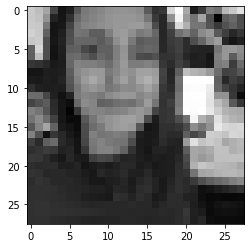

In [159]:
plt.imshow(img, cmap="gray")

TypeError: Invalid shape (1, 28, 28, 1) for image data

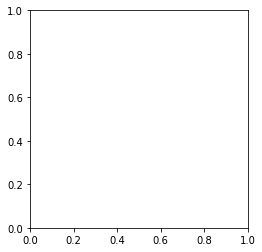

In [184]:
prueba = tryImage('pruebas/prueba3.jpeg')
plt.imshow(prueba, cmap="gray")

In [183]:
model.predict(prueba)

array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [176]:
y_test

,A,B,F,T,V,Y,other
3448,0,0,0,1,0,0,0
13025,0,0,1,0,0,0,0
9002,0,0,0,0,0,0,1
12540,1,0,0,0,0,0,0
10298,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
4058,0,0,0,1,0,0,0
85,1,0,0,0,0,0,0
4442,0,0,0,1,0,0,0
1219,0,1,0,0,0,0,0
